In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Logbook 6

## Lagrangian Points (10/03/2023)

A series of [animations](http://burtleburtle.net/bob/physics/kempler.html) have been made to show some various Klemperer Rosettes, sadly these are written in Javascript which is unintelligible for me, but they provide a good basis for what I should expect to see.

The first animation, while still being a Klemperer rosette (due to the alternating masses), is also a demonstration of what are called Lagrangian points, which are points for where the gravitational forces acting on the small bodies are in equilibrium, such that there is no net force acting on the moons. 

For this situation, we have two moons, a single smaller moon, and a star. The smaller ones are at the Lagrangian points of the big moon - star situation.

According to this [video](https://youtu.be/XRlQtDimEws), we can calculate the lagrangian points L4 and L5 using some basic mechanics, leading to us finding that the Lagrangian points L4 and L5 sit at the corners of equilateral triangles that are formed by m1 and m2.

In [57]:
def L4(G, m1, m2, vr1, vr2):
    """
    Determines the Lagrangian point L4 for a two bodies, m1 and m2, in which m1>>m2. The net force acting on a body at its
    Lagrangian point is zero, and so it would take zero energy to stay at that point. 
    
    Inputs:
    G     The gravitational constant
    m1    The mass of the first body
    m2    The mass of the second body
    vr1   The vector position of mass 1
    vr2   The vector position of mass 2
    
    Outputs
    rt    The vector position of the Lagrangian point L4
    """
    
    R = np.linalg.norm(vr2-vr1)
    theta = np.pi/3
    vR=R*np.array([np.cos(theta),np.sin(theta)])
    rt=vr1+vR
    
    return(rt)

def L5(G, m1, m2, vr1, vr2):
    """
    Determines the Lagrangian point L5 for a two bodies, m1 and m2, in which m1>>m2. The net force acting on a body at its
    Lagrangian point is zero, and so it would take zero energy to stay at that point. 
    
    Inputs:
    G     The gravitational constant
    m1    The mass of the first body
    m2    The mass of the second body
    vr1   The vector position of mass 1
    vr2   The vector position of mass 2
    
    Outputs
    rt    The vector position of the Lagrangian point L5
    """

    R = np.linalg.norm(vr2-vr1)
    theta = -np.pi/3
    vR=R*np.array([np.cos(theta),np.sin(theta)])
    rt=vr1+vR
    
    return(rt)

In [58]:
# The parameters they used are
G = 6.67e-11
m1 = 2e30 # Mass of sun
m2 = 1e25 # Mass of earth 
R = 1.5e11 # distance from Earth to Sun

r1 = m2*R/(m1+m2)
r2 = m1*R/(m1+m2)

v1 = np.sqrt(G*m2*r1/R**2)
v2 = np.sqrt(G*m1*r2/R**2)

Lagrangian4 = L4(G, m1, m2, np.array([-r1,0]), np.array([r2,0]))
Lagrangian5 = L5(G, m1, m2, np.array([-r1,0]), np.array([r2,0]))
print(f"Lagrangian points L4 and L5 are \n {Lagrangian4}\n and \n{Lagrangian5}")


Lagrangian points L4 and L5 are 
 [7.49992500e+10 1.29903811e+11]
 and 
[ 7.49992500e+10 -1.29903811e+11]


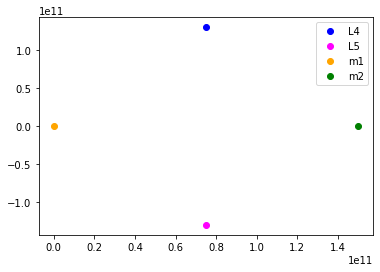

In [59]:
plt.plot(Lagrangian4[0], Lagrangian4[1], 'bo', label = "L4", color = "blue")
plt.plot(Lagrangian5[0], Lagrangian5[1], 'bo', label = "L5", color = "magenta")
plt.plot(-r1, 0, 'bo', label = "m1", color = "orange")
plt.plot(r2, 0, 'bo', label = "m2", color = "Green")
plt.legend()

## Propagating the orbits.

So, if we were to place two objects at L4 and L5, supposedly, they should feel zero net force. Let's try and implement this using our Velocity Verlet algorithm.

So m3 and m4 should be at positions 
 [4.9999     8.66025404] 
 and 
 [ 4.9999     -8.66025404]


(-11.0, 11.0)

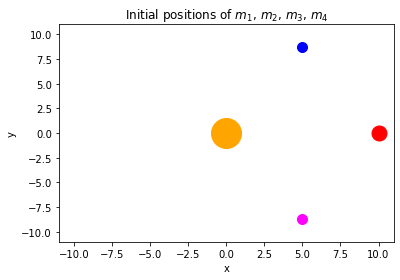

In [69]:
# Parameters

N = 120000 # number of steps

G = 1
m1 = 1 # Mass of sun
m2 = 1e-5 # Mass of earth 
m3 = 1e-8 # Mass of the moon
m4 = np.copy(m3)


R = 10 # distance from Earth to Sun

r1 = m2*R/(m1+m2)
r2 = m1*R/(m1+m2)



R1 = np.zeros((N,2))
R2 = np.zeros((N,2))
R3 = np.zeros((N,2))
R4 = np.zeros((N,2))

R1[0] = np.array([-r1,0])
R2[0] = np.array([r2,0])

Lagrangian4 = L4(G, m1, m2, R1[0], R2[0])
Lagrangian5 = L5(G, m1, m2, R1[0], R2[0])

print(f"So m3 and m4 should be at positions \n {Lagrangian4} \n and \n {Lagrangian5}")

R3[0] = np.copy(Lagrangian4)
R4[0] = np.copy(Lagrangian5)



v1 = np.sqrt(G*m2*r1/R**2)
v2 = np.sqrt(G*m1*r2/R**2)

V1 = np.zeros((N,2))
V2 = np.zeros((N,2))
V3 = np.zeros((N,2))
V4 = np.zeros((N,2))

V1[0] = np.array([v1,0])
V2[0] = np.array([0,-v2])

w = v2 / r2 # All have the same angular speed


r3 = np.linalg.norm(Lagrangian4)
r4 = np.linalg.norm(Lagrangian5)

v3 = w * r3
v4 = w * r4

V3[0] = np.array([0, -v3])
V4[0] = np.array([0, -v4])

plt.plot(R1[0,0], R1[0,1], 'bo', color = "Orange", markersize=30, label = r"$m_1$")
plt.plot(R2[0,0], R2[0,1], 'bo', color = "Red", markersize=15, label = r"$m_2$")
plt.plot(R3[0,0], R3[0,1], 'bo', color = "Blue", markersize=10, label = r"$m_3$")
plt.plot(R4[0,0], R4[0,1], 'bo', color = "Magenta", markersize=10, label = r"$m_4$")


plt.title(r"Initial positions of $m_1$, $m_2$, $m_3$, $m_4$")
plt.xlabel(r"x")
plt.ylabel(r"y")
plt.xlim(-1.1*R, 1.1*R)
plt.ylim(-1.1*R, 1.1*R)

In [70]:
def force(G, m1, m2, r1, r2):
    """
    Returns the force acting on m1 due to m2
    inputs:
    G     gravitational constant
    m1    mass of body 1
    m2    mass of body 2
    r1    radius of body 1
    r2    radius of body 2
    outputs:
    f     the force acting on m1 due to m2  
    """
    
    r_12 = r2 - r1
    r_12_mag = np.linalg.norm(r_12) ** 3
    f = G * (m1 * m2 * r_12) / r_12_mag
    return f

In [71]:
%%time

dt = 1e-4

for i in range(N - 1):
    
    f1 = force(G, m1, m2, R1[i], R2[i]) # negligble + force(m1, m3, R1[i], R3[i]) + force(m1, m4, R1[i], R4[i])
    f2 = force(G, m2, m1, R2[i], R1[i]) # + force(m2, m3, R2[i], R3[i]) + force(m2, m4, R2[i], R4[i])
    f3 = force(G, m3, m1, R3[i], R1[i]) + force(G, m3, m2, R3[i], R2[i]) # + force(m3, m4, R3[i], R4[i])
    f4 = force(G, m4, m1, R1[i], R4[i]) + force(G, m4, m2, R4[i], R2[i]) # + force(m4, m3, R4[i], R3[i])
    
    F1 = force(G, m1, m2, R1[i+1], R2[i+1]) # + force(m1, m3, R1[i+1], R3[i+1]) + force(m1, m4, R1[i+1], R4[i+1])
    F2 = force(G, m2, m1, R2[i+1], R1[i+1]) # + force(m2, m3, R2[i+1], R3[i+1]) + force(m2, m4, R2[i+1], R4[i+1])
    F3 = force(G, m3, m1, R3[i+1], R1[i+1])  + force(G, m3, m2, R3[i+1], R2[i+1]) #+ force(m3, m4, R3[i+1], R4[i+1])
    F4 = force(G, m4, m1, R1[i+1], R4[i+1])  + force(G, m4, m2, R4[i+1], R2[i+1]) #+ force(m4, m3, R4[i+1], R3[i+1])
    
    
    R1[i+1] = R1[i] + dt * V1[i] + dt**2 * f1/(2*m1)
    R2[i+1] = R2[i] + dt * V2[i] + dt**2 * f2/(2*m2)
    R3[i+1] = R3[i] + dt * V3[i] + dt**2 * f3/(2*m3)
    R4[i+1] = R4[i] + dt * V3[i] + dt**2 * f4/(2*m4)
    
    
    V1[i+1] = V1[i] + dt * (f1 + F1) / (2*m1)
    V2[i+1] = V2[i] + dt * (f2 + F2) / (2*m2)
    V3[i+1] = V3[i] + dt * (f1 + F1) / (2*m3)
    V4[i+1] = V4[i] + dt * (f1 + F1) / (2*m4)

<ipython-input-70-11300aec8f3a>:18: RuntimeWarning: invalid value encountered in true_divide
  f = G * (m1 * m2 * r_12) / r_12_mag


Wall time: 26.9 s


In [72]:
print(R1)
print(R2)
print(R3)
print(R4)

[[-9.99990000e-05  0.00000000e+00]
 [-9.99986838e-05  0.00000000e+00]
 [            nan             nan]
 ...
 [            nan             nan]
 [            nan             nan]
 [            nan             nan]]
[[ 9.99990000e+00  0.00000000e+00]
 [ 9.99990000e+00 -3.16226185e-05]
 [            nan             nan]
 ...
 [            nan             nan]
 [            nan             nan]
 [            nan             nan]]
[[4.9999     8.66025404]
 [4.9999     8.66022242]
 [       nan        nan]
 ...
 [       nan        nan]
 [       nan        nan]
 [       nan        nan]]
[[ 4.9999     -8.66025404]
 [ 4.9999     -8.66028566]
 [        nan         nan]
 ...
 [        nan         nan]
 [        nan         nan]
 [        nan         nan]]


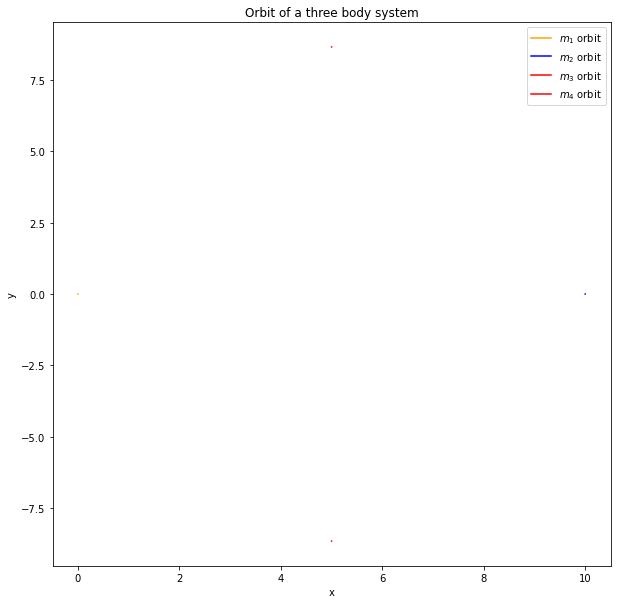

In [73]:
plt.figure(figsize = (10,10))

plt.plot(R1[:,0], R1[:,1], label = r"$m_1$ orbit", color = 'orange')
plt.plot(R2[:,0], R2[:,1], label = r"$m_2$ orbit", color = 'blue')
plt.plot(R3[:,0], R3[:,1], label = r"$m_3$ orbit", color = 'red')
plt.plot(R4[:,0], R4[:,1], label = r"$m_4$ orbit", color = 'red')


plt.xlabel("x")
plt.ylabel("y")
plt.title("Orbit of a three body system")
plt.legend(loc = 'upper right')

# If you set %matplotlib notebook you can zoom in and see that m_3 spirals around m_2.